In [1]:
import numpy as np 
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

import warnings         
warnings.filterwarnings("ignore")

In [2]:
dfe = pd.read_csv("dataset/resampled-train.csv")

In [3]:

X_resampled = dfe[['ODO', 'Year', 'Age', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Diesel', 'Fuel_Petrol', 'Transmission_Automatic', 'Transmission_Manual', 'Owner_First', 'Owner_Fourth & Above', 'Owner_Second', 'Owner_Third']]

y_resampled = dfe['Price_Category']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




Epoch 1/25


431/431 [==============================] - 9s 8ms/step - loss: 0.2907 - accuracy: 0.9276 - val_loss: 0.0779 - val_accuracy: 0.9770
Epoch 2/25
431/431 [==============================] - 3s 6ms/step - loss: 0.0716 - accuracy: 0.9786 - val_loss: 0.0479 - val_accuracy: 0.9875
Epoch 3/25
431/431 [==============================] - 2s 6ms/step - loss: 0.0526 - accuracy: 0.9836 - val_loss: 0.0372 - val_accuracy: 0.9901
Epoch 4/25
431/431 [==============================] - 3s 6ms/step - loss: 0.0423 - accuracy: 0.9867 - val_loss: 0.0301 - val_accuracy: 0.9922
Epoch 5/25
431/431 [==============================] - 3s 6ms/step - loss: 0.0366 - accuracy: 0.9894 - val_loss: 0.0249 - val_accuracy: 0.9930
Epoch 6/25
431/431 [==============================] - 3s 6ms/step - loss: 0.0372 - accuracy: 0.9887 - val_loss: 0.0350 - val_accuracy: 0.9922
Epoch 7/25
431/431 [==============================] - 2s 6ms/step - loss: 0.0319 - accuracy: 0.9904 - val_loss: 0.0204 - val_accuracy: 0.9942
Ep

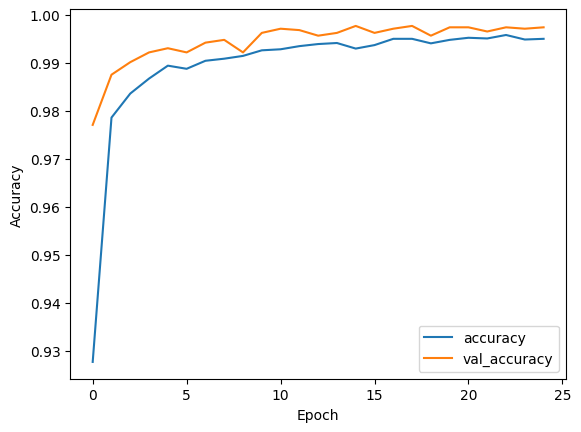

108/108 [==============================] - 1s 2ms/step
Accuracy: 0.997384481255449
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1200
           1       1.00      0.99      1.00      1122
           2       0.99      1.00      1.00      1119

    accuracy                           1.00      3441
   macro avg       1.00      1.00      1.00      3441
weighted avg       1.00      1.00      1.00      3441

Confusion Matrix:
[[1200    0    0]
 [   0 1113    9]
 [   0    0 1119]]


In [5]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

num_classes = 3
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=num_classes, activation='softmax'))  # Output layer with softmax for multi-class

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_reshaped, y_train_cat, epochs=25, batch_size=32, validation_data=(X_test_reshaped, y_test_cat), verbose=1)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

y_pred = np.argmax(model.predict(X_test_reshaped), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)


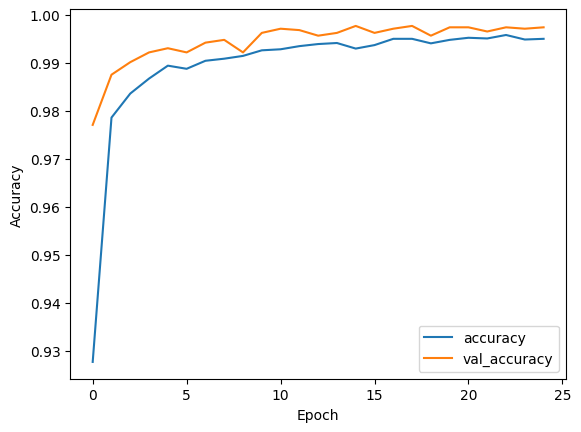

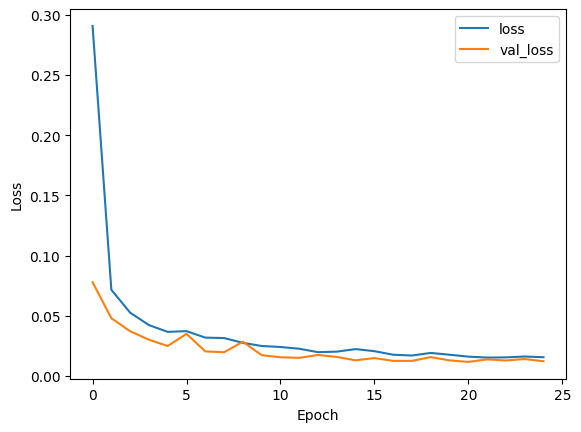

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


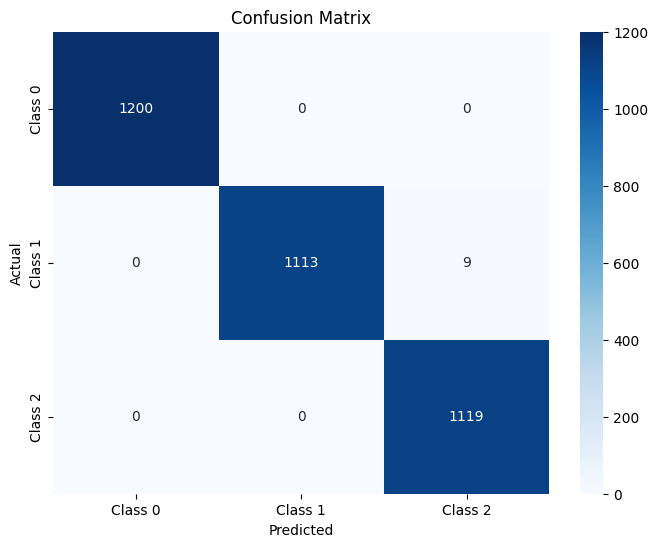

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
